In [21]:
from pyopenms import *

tsg = TheoreticalSpectrumGenerator()
spec1 = MSSpectrum()
peptide = AASequence.fromString("MAELQMLLEEEIDSRSSSREN")
p = Param()
p.setValue("add_b_ions", "false")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec1, peptide, 1, 1) 
print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

Spectrum 1 of MAELQMLLEEEIDSRSSSREN has 20 peaks.
y1+ is generated at m/z 133.060769721971
y2+ is generated at m/z 262.10336394527104
y3+ is generated at m/z 418.20447532807106
y4+ is generated at m/z 505.23650448757104
y5+ is generated at m/z 592.268533647071
y6+ is generated at m/z 679.300562806571
y7+ is generated at m/z 835.401674189371
y8+ is generated at m/z 922.433703348871
y9+ is generated at m/z 1037.460647508371
y10+ is generated at m/z 1150.5447118592708
y11+ is generated at m/z 1279.5873060825709
y12+ is generated at m/z 1408.629900305871
y13+ is generated at m/z 1537.672494529171
y14+ is generated at m/z 1650.756558880071
y15+ is generated at m/z 1763.840623230971
y16+ is generated at m/z 1894.8811082480709
y17+ is generated at m/z 2022.9396865032709
y18+ is generated at m/z 2136.023750854171
y19+ is generated at m/z 2265.066345077471
y20+ is generated at m/z 2336.103459236971


Text(0, 0.5, 'intensity')

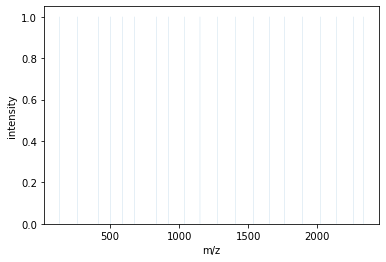

In [22]:
import matplotlib.pyplot as plt
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")

Text(0, 0.5, 'intensity')

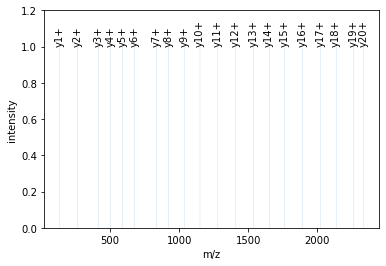

In [23]:
mz,i = spec1.get_peaks()
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False) 
idx = 0
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[idx].decode(), ha='center', va='bottom', rotation=90)
    idx += 1
plt.ylim(top=1.2)
plt.xlabel("m/z")
plt.ylabel("intensity")

In [24]:
spec2 = MSSpectrum()
p.setValue("add_b_ions", "true")
p.setValue("add_a_ions", "true")
p.setValue("add_losses", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec2, peptide, 1, 2)

# Iterate over annotated ions and their masses
print("Spectrum 2 of", peptide, "has", spec2.size(), "peaks.")
for ion, peak in zip(spec2.getStringDataArrays()[0], spec2):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

exp = MSExperiment()
exp.addSpectrum(spec1)
exp.addSpectrum(spec2)
MzMLFile().store("DFPIANGER.mzML", exp)

Spectrum 2 of MAELQMLLEEEIDSRSSSREN has 450 peaks.
y1-H3N1++ is generated at m/z 58.520748546521006
y1++ is generated at m/z 67.03402309437101
a3-H2O1++ is generated at m/z 78.044390626271
a2++ is generated at m/z 88.04861855507099
b3-H2O1++ is generated at m/z 92.04184812627099
b2++ is generated at m/z 102.04607605507098
y1-H3N1+ is generated at m/z 116.03422062627101
y2-H2O1++ is generated at m/z 122.550037674121
y2-H3N1++ is generated at m/z 123.042045658171
y2++ is generated at m/z 131.555320206021
y1+ is generated at m/z 133.060769721971
a4-H2O1++ is generated at m/z 134.586422801721
b4-H2O1++ is generated at m/z 148.583880301721
a3++ is generated at m/z 152.569915666721
a3-H2O1+ is generated at m/z 155.08150478577102
b3++ is generated at m/z 166.56737316672098
a2+ is generated at m/z 175.089960643371
b3-H2O1+ is generated at m/z 183.076419785771
y3-C1H2N1O1++ is generated at m/z 187.59905636552102
y3-C1H2N2++ is generated at m/z 188.594976865521
a5-H2O1++ is generated at m/z 198.

Text(0, 0.5, 'intensity')

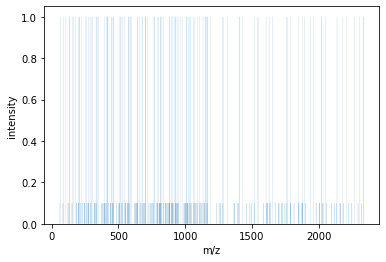

In [25]:
import matplotlib.pyplot as plt
plt.bar(spec2.get_peaks()[0], spec2.get_peaks()[1], snap=False) # snap ensures that all bars are rendered
plt.xlabel("m/z")
plt.ylabel("intensity")